# 🎓 **Taller 4.1: Taller de Medidas de Similitud y Disimilitud**


## OBJETIVOS DEL TALLER:
Comprender y aplicar diferentes medidas de similitud y disimilitud en conjuntos de datos, analizando su comportamiento en distintos contextos de distribución de datos. Implementar y calcular al menos 6 medidas de distancia diferentes:

* ✅Distancia Euclidiana (L2)
* ✅Distancia Manhattan (L1)
* ✅Distancia Chebyshev (L∞)
* ✅Similitud de Coseno
* ✅Distancia de Mahalanobis
* ✅Distancia de Jaccard

Representar gráficamente datasets en espacios bidimensionales

* ✅Visualizar centros y puntos de referencia en gráficos de dispersión
* ✅Interpretar relaciones espaciales a partir de representaciones visuales

# 🔧 **CONFIGURACIÓN INICIAL**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

In [2]:
import scipy.stats as st

def visualize_dataset(x, y, ds_center, c1, c2):
  fig, ax = plt.subplots()
  ax.scatter(x, y)
  ds_center_r = [np.mean(x), np.mean(y)]
  print(f'Centro real del cluster: x={ds_center_r[0]:.2f}, y={ds_center_r[1]:.2f}')
  print(f'Centro del cluster utilizado para el ejemplo: x={ds_center[0]:.2f}, y={ds_center[1]:.2f}')
  ax.scatter(ds_center[0], ds_center[1], s=200, c='b')
  # plot candidates
  ax.scatter(c1[0], c1[1], s=200, c='r')
  ax.scatter(c2[0], c2[1], s=200, c='g', marker='v')
  deltaX = (max(x) - min(x))/10
  deltaY = (max(y) - min(y))/10
  xmin = min(x) - deltaX
  xmax = max(x) + deltaX
  ymin = min(y) - deltaY
  ymax = max(y) + deltaY
  # Create meshgrid
  xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
  positions = np.vstack([xx.ravel(), yy.ravel()])
  values = np.vstack([x, y])
  kernel = st.gaussian_kde(values)
  f = np.reshape(kernel(positions).T, xx.shape)
  # create gaussian contour lines
  cfset = ax.contourf(xx, yy, f, cmap='coolwarm', alpha=0.2)
  ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax], alpha=0.2)
  # write labels
  cset = ax.contour(xx, yy, f, colors='k', linestyles='dotted')
  ax.clabel(cset, inline=1, fontsize=10)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  plt.title('Kernel Gaussiano 2D')

In [3]:
def visualize_scatter(x, y, ds_center, c1, c2):
  ds_center_real= [np.mean(x), np.mean(y)]
  plt.figure(figsize=(8, 6))  # Tamaño del gráfico
  plt.scatter(x, y, color='blue', alpha=0.6, label='Puntos de datos')
  plt.scatter(ds_center[0], ds_center[1], color='red', marker='X', s=100, label='Centro [2, 2]')
  plt.scatter(ds_center_real[0], ds_center_real[1], color='y', marker='X', s=100, label='Centro Real')
  plt.scatter(c1[0], c1[1], s=200, c='red', label='Candidato 1 (rojo)')
  plt.scatter(c2[0], c2[1], s=200, c='green', marker='v', label='Candidato 2 (verde)')
  plt.xlabel('Variable 1 (data_var_1)')
  plt.ylabel('Variable 2 (data_var_2)')
  plt.title('Dataset 2D con Distribución Normal alrededor de [2, 2]')
  plt.grid(True, linestyle='--', alpha=0.5)
  plt.legend()
  plt.show()

# 📁 **CREAR LOS DATASETS Y GRAFIQUE SUS DISTRIBUCIONES**

In [4]:
# Crear un dataset artificial alrededor de un punto
def cargar_datasetDistNormal(n_data_points = 50, ds_center = np.array([2, 2])):
    # para hacer los experimentos reproducibles
    np.random.seed(42)
    # generamos los puntox en 2D con funcion normal, al rededor del centro
    data_var_1 = np.random.randn(n_data_points) + ds_center[0]
    data_var_2 = np.random.randn(n_data_points) + ds_center[1]
    return data_var_1, data_var_2

In [5]:
# Crear un dataset artificial alrededor de un punto con una relacion lineal de dependencia entre las variables
def cargar_datasetRelacionLineal(factor=np.array([1, 1]), n_data_points = 50, ds_center = np.array([2, 2])):
    # para hacer los experimentos reproducibles
    np.random.seed(42)
    # generar los datos con una relacion lineal
    data_var_1b = factor[0] * np.random.randn(n_data_points) + ds_center[0]
    data_var_2b = data_var_1b + factor[1] * np.random.randn(n_data_points)
    return data_var_1b, data_var_2b

In [6]:
# Crear un dataset artificial alrededor de un punto con una relacion cuadratica de dependencia entre las variables
def cargar_datasetRelacionCuadratica(coeficientes=np.array([1, 0, 0]),
                                     n_data_points=50,
                                     rango_x=(-5, 5)):
    #coeficientes : array de 3 elementos [a, b, c]
    #    Coeficientes de la ecuación cuadrática: y = a*x² + b*x + c
    # Para hacer los experimentos reproducibles
    np.random.seed(42)
    # Extraer coeficientes
    a, b, c = coeficientes
    # Generar valores x uniformemente distribuidos
    x = np.random.uniform(rango_x[0], rango_x[1], n_data_points)
    # Aplicar la transformación cuadrática
    y_ideal = a * x**2 + b * x + c
    # Añadir ruido aleatorio (proporcional al rango de y)
    rango_y = np.max(y_ideal) - np.min(y_ideal)
    ruido = 0.1 * rango_y * np.random.randn(n_data_points)
    y = y_ideal + ruido
    return x, y

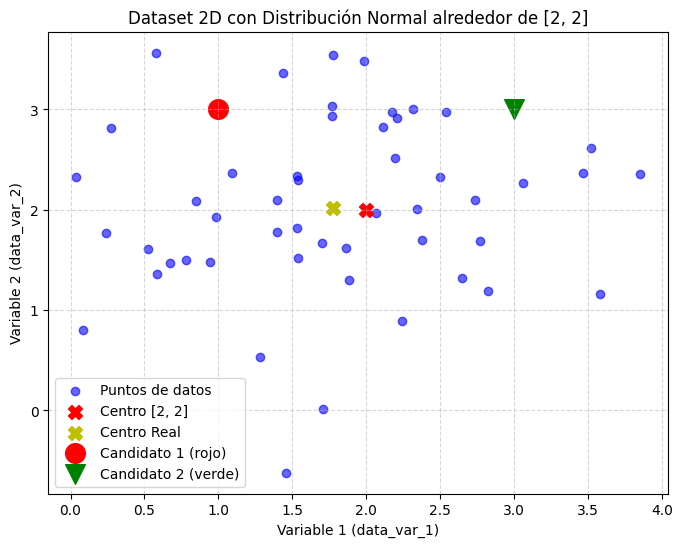

Centro real del cluster: x=1.77, y=2.02
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00


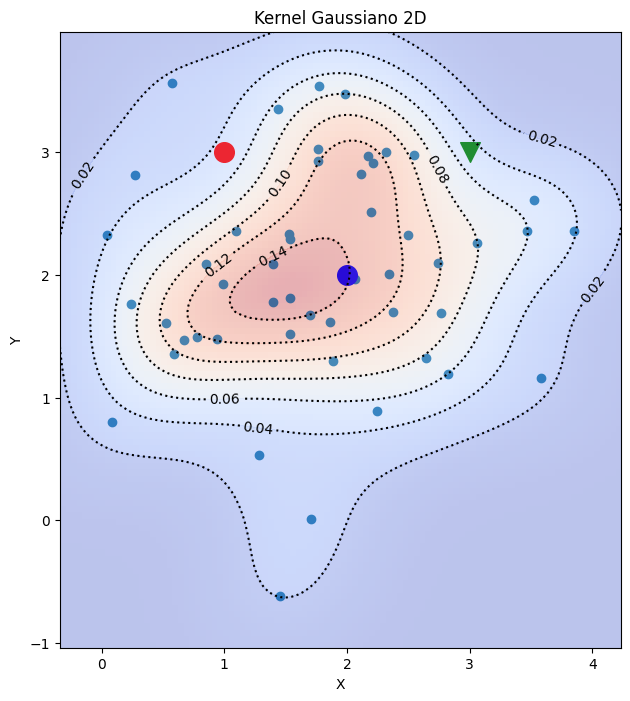

In [7]:
# Cargar dataset
ds_center = np.array([2, 2])
dx, dy =cargar_datasetDistNormal(50, ds_center)
# establecemos nuestros dos puntos candidatos de prueba
c1 = np.array([ds_center[0] - 1, 3])
c2 = np.array([ds_center[1] + 1, 3])
visualize_scatter(dx, dy, ds_center, c1, c2)
visualize_dataset(dx, dy, ds_center, c1, c2)

# 🎯 **EJ 1:GRAFIQUE LAS DISTRIBUCIONES DE LOS DATASETS**

In [13]:
# TODO 1.1 crear y visualizar el dataset con relacion lineal y con relacion cuadratica
dxr, dyr = cargar_datasetRelacionLineal([1, 0.5], 50, [2, 2])  # ← COMPLETADO
dx2, dy2 = cargar_datasetRelacionCuadratica([1, 0, 0], 50, (-5, 5))  # ← COMPLETADO

Dataset con Relación Lineal:


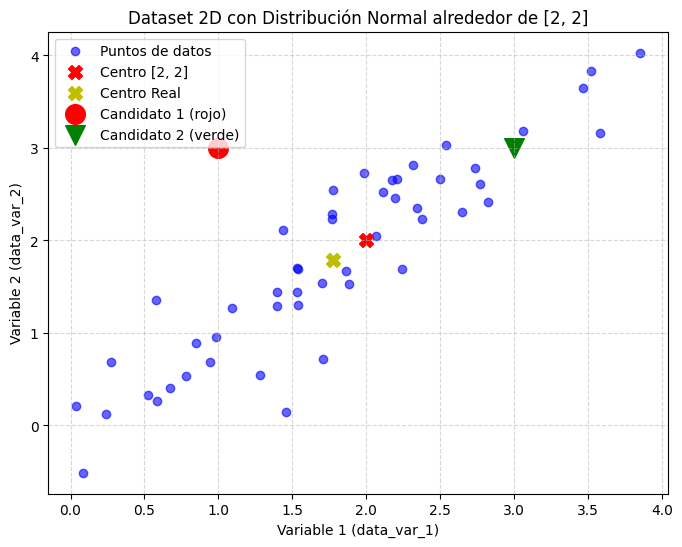

Centro real del cluster: x=1.77, y=1.78
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00

Dataset con Relación Cuadrática:


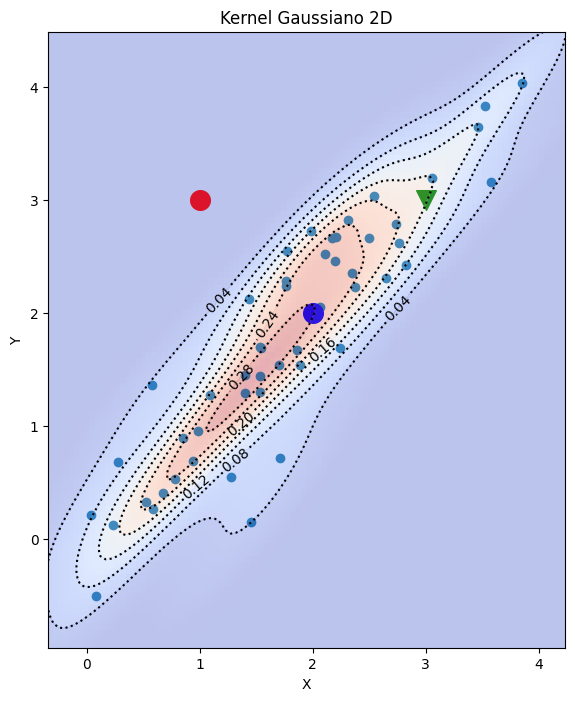

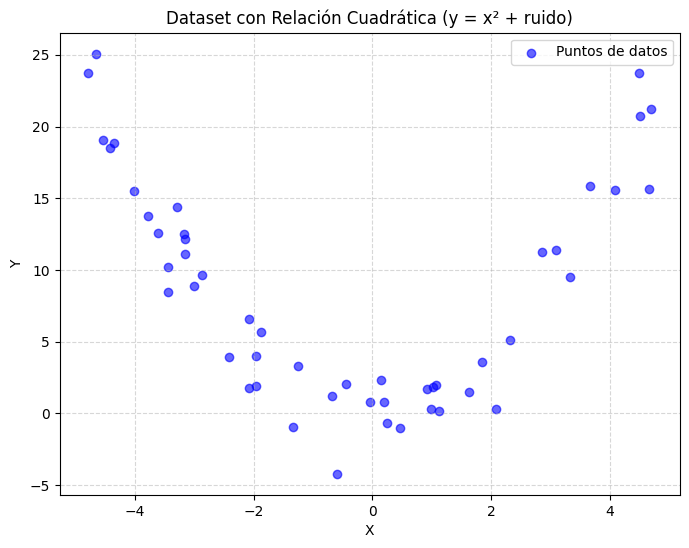

In [14]:
# Visualizar dataset con relación lineal
print("Dataset con Relación Lineal:")
visualize_scatter(dxr, dyr, [2, 2], c1, c2)
visualize_dataset(dxr, dyr, [2, 2], c1, c2)

# Visualizar dataset con relación cuadrática
print("\nDataset con Relación Cuadrática:")
plt.figure(figsize=(8, 6))
plt.scatter(dx2, dy2, color='blue', alpha=0.6, label='Puntos de datos')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset con Relación Cuadrática (y = x² + ruido)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

In [16]:
dxGrande, dyGrande = cargar_datasetRelacionLineal([20, 10], 1000, [50, 100])

# 🎯 **EJ 2: IDENTIFIQUE QUE TAN DEPENDIENTES SON LOS DATASETS**

In [17]:
# TODO 2.1 : Use la covarianza para identificar que tan dependiente es la relacion que existe entre los registros de los datasets
print('Covarianza dataset con distribución normal:')
print(np.cov(dx, dy))
print()

print('Covarianza dataset con relación lineal:')
print(np.cov(dxr, dyr))
print()

print('Covarianza dataset con relación lineal Grande:')
print(np.cov(dxGrande, dyGrande))
print()

print('Covarianza dataset con relación cuadrática:')
print(np.cov(dx2, dy2))
print()

Covarianza dataset con distribución normal:
[[0.87173739 0.08985489]
 [0.08985489 0.76444418]]

Covarianza dataset con relación lineal:
[[0.87173739 0.91666484]
 [0.91666484 1.15270333]]

Covarianza dataset con relación lineal Grande:
[[383.54554143 375.65364293]
 [375.65364293 467.25326789]]

Covarianza dataset con relación cuadrática:
[[ 8.34535038 -2.48409573]
 [-2.48409573 60.72673368]]



### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué dataset tiene una mayor dependencia lineal entre sus dos variables?


    Según la covarianza, el dataset con relación lineal grande tiene la covarianza más alta en valor absoluto (375.65). Esto indica una fuerte dependencia lineal positiva, aunque la escala es grande debido a la amplitud de los datos.

¿Cual es el problema que tiene la covarianza?


    La covarianza depende de la escala de las variables. Por ejemplo, el dataset grande tiene covarianza ~375, mientras que el dataset lineal normal tiene ~0.91, pero ambos tienen una relación lineal fuerte. Esto hace difícil comparar entre datasets con diferentes unidades o escalas.

In [40]:
# TODO 2.2: Use el coeficiente de correlación de Pearson
print('--- Coeficientes de Pearson ---')
print('Dataset normal:', np.corrcoef(dx, dy)[0, 1])
print('Dataset lineal:', np.corrcoef(dxr, dyr)[0, 1])
print('Dataset lineal grande:', np.corrcoef(dxGrande, dyGrande)[0, 1])
print('Dataset cuadrático:', np.corrcoef(dx2, dy2)[0, 1])

--- Coeficientes de Pearson ---
Dataset normal: 0.11007178534016056
Dataset lineal: 0.9144478888937349
Dataset lineal grande: 0.8873663623612619
Dataset cuadrático: -0.11034586920361944


### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué dataset tiene una mayor dependencia lineal entre sus dos variables?



    Según el coeficiente de Pearson:

    Dataset normal: 0.11 (débil)

    Dataset lineal: 0.914 (muy fuerte)

    Dataset lineal grande: 0.887 (muy fuerte)

    Dataset cuadrático: -0.11 (débil)

¿Que medida es mas facil de interpretar para identificar la dependencia entre dos variables de un dataset?



    El coeficiente de Pearson es mucho más fácil de interpretar porque:

    Está normalizado entre -1 y 1

    Su valor indica directamente la fuerza y dirección de la relación lineal

    Es comparable entre diferentes conjuntos de datos, independientemente de sus escalas

# 🎯 **EJ 3: CREE LAS FUNCIONES DE LAS MEDIDAS DE DISIMILITUD**

In [41]:
#  TODO 3.1 completar el codigo de las funciones de las siguientes medidas de disimilitud:
#  Distancia Euclidiana, Distancia Manhattan, Distancia Chebyshev, Similitud de Coseno, Mahalanobis y Jaccard
#  En scipy.spatial.distance tenemos disponibles las distancias minkowski, mahalanobis, jaccard, hamming, euclidean, cosine, entre otras.
#  En numpy tenemos la norma p =  np.linalg.norm

In [42]:
def distancia_euclidiana(p1, p2):
   dist = np.linalg.norm(p2 - p1, ord=2)
   print(f'Distancia euclidiana del punto {p1} al punto {p2} = {dist:.4f}')
   return dist

In [43]:
def distancia_manhattan(p1, p2):
   dist = np.linalg.norm(p2 - p1, ord=1)  # ord=1 para Manhattan
   print(f'Distancia Manhattan del punto {p1} al punto {p2} = {dist:.4f}')
   return dist

In [44]:
def distancia_chebyshev(p1, p2):
   dist = np.linalg.norm(p2 - p1, ord=np.inf)  # ord=inf para Chebyshev
   print(f'Distancia Chebyshev del punto {p1} al punto {p2} = {dist:.4f}')
   return dist

In [45]:
def similitud_coseno(p1, p2):
   # Similitud = cos(θ) = (p1·p2) / (||p1|| * ||p2||)
   dot_product = np.dot(p1, p2)
   norm_p1 = np.linalg.norm(p1)
   norm_p2 = np.linalg.norm(p2)
   similitud = dot_product / (norm_p1 * norm_p2)
   print(f'Similitud coseno entre {p1} y {p2} = {similitud:.4f}')
   return similitud

In [46]:
def distancia_mahalanobis(p1, p2, cov_inv):
   """
   p1, p2: puntos
   cov_inv: inversa de la matriz de covarianza del dataset
   """
   diff = p2 - p1
   # Distancia de Mahalanobis: sqrt((x-y)^T * Σ^(-1) * (x-y))
   dist = np.sqrt(np.dot(np.dot(diff.T, cov_inv), diff))
   print(f'Distancia Mahalanobis del punto {p1} al punto {p2} = {dist:.4f}')
   return dist

In [47]:
def distancia_jaccard(set1, set2):
   """
   Para conjuntos (no para puntos continuos).
   Distancia Jaccard = 1 - (|A∩B| / |A∪B|)
   """
   intersection = len(set1.intersection(set2))
   union = len(set1.union(set2))
   if union == 0:
       return 0
   jaccard_sim = intersection / union
   jaccard_dist = 1 - jaccard_sim
   print(f'Distancia Jaccard entre {set1} y {set2} = {jaccard_dist:.4f}')
   return jaccard_dist

In [48]:
# Ejecutar funciones
print("Calculando las distancias de los puntos candidatos al centro")

# Para el primer dataset (dx, dy)
print('\n--- Primer dataset (normal) ---')
ds_center = np.array([np.mean(dx), np.mean(dy)])  # Centro real
print(f'Centro del dataset: {ds_center}')

dist_euc1 = distancia_euclidiana(c1, ds_center)
dist_euc2 = distancia_euclidiana(c2, ds_center)

dist_man1 = distancia_manhattan(c1, ds_center)
dist_man2 = distancia_manhattan(c2, ds_center)

dist_cheb1 = distancia_chebyshev(c1, ds_center)
dist_cheb2 = distancia_chebyshev(c2, ds_center)

sim_cos1 = similitud_coseno(c1, ds_center)
sim_cos2 = similitud_coseno(c2, ds_center)

# Para Mahalanobis necesitamos la inversa de la covarianza
cov_matrix = np.cov(np.vstack([dx, dy]))
cov_inv = np.linalg.inv(cov_matrix)
dist_mah1 = distancia_mahalanobis(c1, ds_center, cov_inv)
dist_mah2 = distancia_mahalanobis(c2, ds_center, cov_inv)

# Para Jaccard (convertimos a conjuntos discretos)
# Como ejemplo, redondeamos los puntos a enteros
set_c1 = set(np.round(c1).astype(int))
set_c2 = set(np.round(c2).astype(int))
set_center = set(np.round(ds_center).astype(int))
dist_jac1 = distancia_jaccard(set_c1, set_center)
dist_jac2 = distancia_jaccard(set_c2, set_center)

# Para el segundo dataset (lineal)
print('\n--- Segundo dataset (lineal) ---')
ds_center2 = np.array([np.mean(dxr), np.mean(dyr)])
print(f'Centro del dataset lineal: {ds_center2}')

# Podemos calcular solo algunas como ejemplo
dist_euc1_lineal = distancia_euclidiana(c1, ds_center2)
dist_euc2_lineal = distancia_euclidiana(c2, ds_center2)

# Mahalanobis para dataset lineal
cov_matrix2 = np.cov(np.vstack([dxr, dyr]))
cov_inv2 = np.linalg.inv(cov_matrix2)
dist_mah1_lineal = distancia_mahalanobis(c1, ds_center2, cov_inv2)
dist_mah2_lineal = distancia_mahalanobis(c2, ds_center2, cov_inv2)

Calculando las distancias de los puntos candidatos al centro

--- Primer dataset (normal) ---
Centro del dataset: [1.77452609 2.01778087]
Distancia euclidiana del punto [1 3] al punto [1.77452609 2.01778087] = 1.2509
Distancia euclidiana del punto [3 3] al punto [1.77452609 2.01778087] = 1.5705
Distancia Manhattan del punto [1 3] al punto [1.77452609 2.01778087] = 1.7567
Distancia Manhattan del punto [3 3] al punto [1.77452609 2.01778087] = 2.2077
Distancia Chebyshev del punto [1 3] al punto [1.77452609 2.01778087] = 0.9822
Distancia Chebyshev del punto [3 3] al punto [1.77452609 2.01778087] = 1.2255
Similitud coseno entre [1 3] y [1.77452609 2.01778087] = 0.9212
Similitud coseno entre [3 3] y [1.77452609 2.01778087] = 0.9979
Distancia Mahalanobis del punto [1 3] al punto [1.77452609 2.01778087] = 1.4771
Distancia Mahalanobis del punto [3 3] al punto [1.77452609 2.01778087] = 1.6410
Distancia Jaccard entre {np.int64(1), np.int64(3)} y {np.int64(2)} = 1.0000
Distancia Jaccard entre {np.

### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué medidas de disimilitud son de un punto a otro punto?
¿Qué medidas de disimilitud son de un punto a una distribución?


    1) Euclidiana, Manhattan, Chebyshev y Coseno porque todas dan valores fijos para el par [1,3] vs centro:

    Euclidiana: 1.2509

    Manhattan: 1.7567

    Chebyshev: 0.9822

    Coseno: 0.9212
    Estos valores no cambian aunque los datos alrededor tengan diferente distribución.

    2) Solo Mahalanobis.
    Dataset normal: Mahalanobis([1,3]) = 1.4771

    Dataset lineal: Mahalanobis([1,3]) = 4.7474 (¡aumentó 3.2x!)
    El mismo punto [1,3] tiene distancias Mahalanobis diferentes según la distribución de datos, porque Mahalanobis usa la matriz de covarianza.


    
¿La distancia de Mahalanobis es capaz de tener en cuenta la distribución real de los datos?



    SÍ, pq el punto [3,3] en el dataset lineal:
    Euclidiana dice: 1.7268 (más lejos que [1,3] que tiene 1.4422)

    Mahalanobis dice: 1.3230 (¡más cerca que [1,3] que tiene 4.7474!) porque:
    Los datos lineales están correlacionados (covarianza = 0.9167)

    [3,3] sigue la tendencia principal de los datos (y = x)

    [1,3] se desvía de la tendencia (está fuera de la correlación)

    Mahalanobis detecta esto y ajusta las distancias.

# 🔄 **EJ 4: MATRIZ DE DISTANCIAS**

Cree un metodo que sea capaz de calcular la matriz de distancias de todos los puntos de un dataset, recive como parametros la medida de disimilitud y en algunos casos la matriz de covarianza

In [49]:
# --- 1. DEFINIR FUNCIONES ---
import itertools as it

# Funciones de distancia
def euclidean_dist(p1, p2):
    return np.linalg.norm(p2 - p1, ord=2)

def mahalanobis_dist(p1, p2, cov_inv):
    diff = p2 - p1
    return np.sqrt(np.dot(np.dot(diff.T, cov_inv), diff))

# Función matriz_distancias
def matriz_distancias(X, distancia, mC=None):
    n_samples = X.shape[0]
    mD = np.zeros((n_samples, n_samples))
    for i, j in it.product(range(n_samples), repeat=2):
        if mC is not None:
            mD[i, j] = distancia(X[i], X[j], mC)
        else:
            mD[i, j] = distancia(X[i], X[j])
    return mD

In [50]:
# --- 2. PREPARAR DATOS ---
# Usar el dataset normal
X_normal = np.column_stack((dx, dy))

# Matriz de covarianza e inversa (para Mahalanobis)
mC_normal = np.cov(X_normal.T)
mC_inv_normal = np.linalg.inv(mC_normal)

# Usar solo 10 puntos para visualización clara
X_small = X_normal[:10]


In [51]:
# --- 3. CALCULAR MATRICES ---
print("Calculando matriz de distancias Euclidianas...")
Ma_euclidea = matriz_distancias(X_small, euclidean_dist)
print("Dimensiones:", Ma_euclidea.shape)

print("\nCalculando matriz de distancias Mahalanobis...")
Ma_mahalanobis = matriz_distancias(X_small, mahalanobis_dist, mC_inv_normal)
print("Dimensiones:", Ma_mahalanobis.shape)

Calculando matriz de distancias Euclidianas...
Dimensiones: (10, 10)

Calculando matriz de distancias Mahalanobis...
Dimensiones: (10, 10)


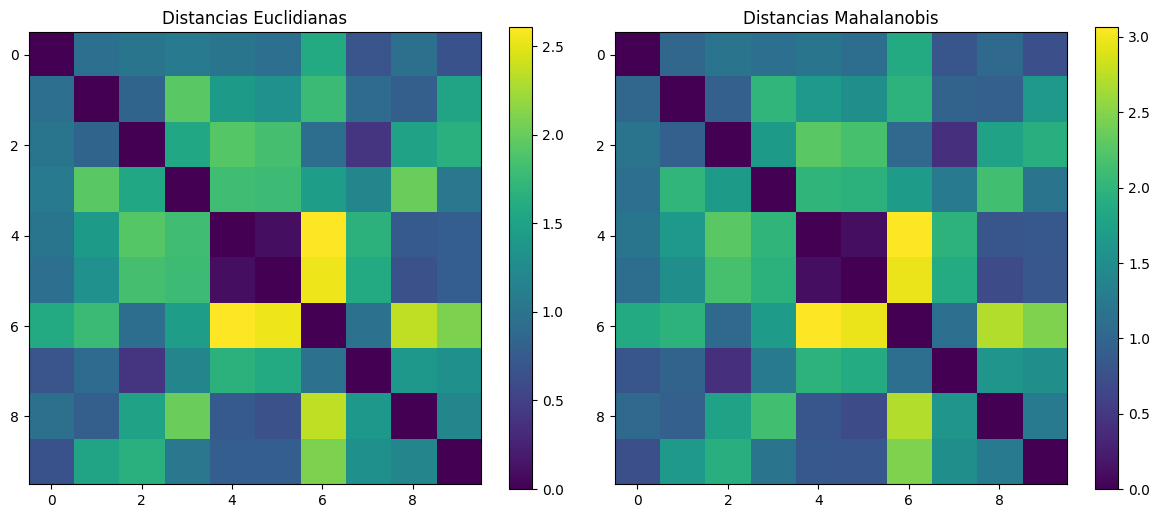

In [52]:
# --- 4. VISUALIZAR MATRICES DE DISTANCIA ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matriz Euclidiana
im0 = axes[0].imshow(Ma_euclidea, cmap='viridis')
axes[0].set_title('Distancias Euclidianas')
plt.colorbar(im0, ax=axes[0])

# Matriz Mahalanobis
im1 = axes[1].imshow(Ma_mahalanobis, cmap='viridis')
axes[1].set_title('Distancias Mahalanobis')
plt.colorbar(im1, ax=axes[1])

plt.tight_layout()
plt.show()

In [53]:
# --- 5. FUNCIÓN MATRIZ_SIMILITUD ---
def matriz_similitud(X, distancia, mC=None):
    # Obtener matriz de distancias
    if mC is not None:
        mD = matriz_distancias(X, distancia, mC)
    else:
        mD = matriz_distancias(X, distancia)

    # Convertir distancias a similitudes
    mS = 1 / (1 + mD)
    return mS


Calculando matriz de similitud...


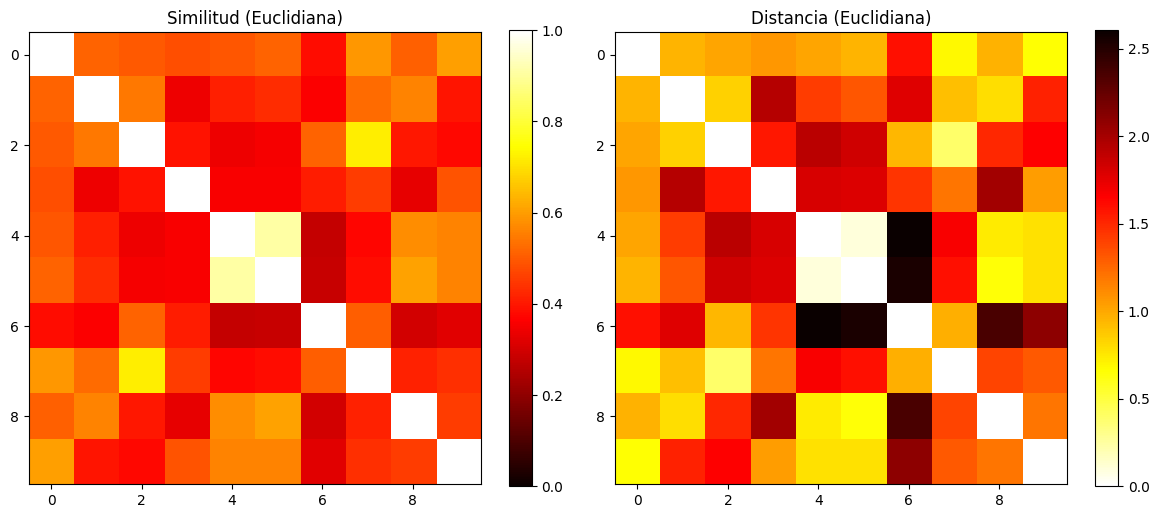

In [54]:
# --- 6. CALCULAR Y VISUALIZAR SIMILITUD ---
print("\nCalculando matriz de similitud...")
mS_euclidea = matriz_similitud(X_small, euclidean_dist)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matriz de similitud
im0 = axes[0].imshow(mS_euclidea, cmap='hot', vmin=0, vmax=1)
axes[0].set_title('Similitud (Euclidiana)')
plt.colorbar(im0, ax=axes[0])

# Matriz de distancia para comparar
im1 = axes[1].imshow(Ma_euclidea, cmap='hot_r')
axes[1].set_title('Distancia (Euclidiana)')
plt.colorbar(im1, ax=axes[1])

plt.tight_layout()
plt.show()

# ✅ **RESULTADOS:**
¿Cual grafico es mas facil de interpretar: el de una medida de disimilitud o de similitud?


    La matriz de similitud es más fácil de interpretar porque:

    Intuitiva: Amarillo = similar, Rojo = diferente

    Normalizada: Siempre entre 0 y 1

    Directa: Valor alto = alta similitud, valor bajo = baja similitud

    Para clustering: Identifica grupos claramente (amarillo = mismo grupo)

    La distancia requiere pensar al revés: valor bajo = cercano, valor alto = lejano.



# 🚀 ¡TALLER FINALIZADO!"